<h1>基于人脸的常见表情识别——数据获取与整理</h1>

1. [项目背景](#项目背景)

2. [数据获取](#数据获取)<br>
   [2.1 数据爬取](#2.1-数据爬取)<br>
 
3. [数据整理](#数据整理)<br>
   [3.1 图片格式统一](#3.1-图片格式统一)<br>
   [3.2 数据清洗](#3.2-数据清洗)<br>
   [3.3 提取嘴唇区域](#3.3-提取嘴唇区域)<br>
   
   

该 Task 就是本训练营的实战部分了，这一部分我们会讲解如何获取数据集，并对数据集进行整理。

> 这个 Task 会涉及到数据集等文件的下载，请运行以下代码下载相关文件，由于需要对下载的文件进行解压，所以速度会比较慢，请耐心等候。（**大概需要 8 分钟左右**）

> 如果你**不是**第一次运行这个项目，那么就跳过以下代码


In [1]:
print("****************下载文件中。。。")
!wget http://tianchi-media.oss-cn-beijing.aliyuncs.com/dragonball/DL/other/data/Emotion_Recognition_File.zip
print("****************下载完成。。。")

****************下载文件中。。。
****************下载完成。。。


'wget' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [2]:
print("****************解压文件中。。。")
# import os
# print(os.getcwd())
!unzip -q -o ./Emotion_Recognition_File.zip -d ./Emotion_Recognition_File/
print("****************解压完毕***************")

****************解压文件中。。。
****************解压完毕***************


'unzip' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


---

**为了帮助大家理解所下载的文件，这里将会做一个简单的说明**

所有下载的文件均在 `Emotion_Recognition_File` （表情识别的英文名称）文件夹下，以下对各个文件进行说明
1. img_type_test：放置了不同后缀名的图片，在 [3.1 图片格式统一](#3.1-图片格式统一) 将会使用到
2. face_detect_model：放置了人脸检测所需要的模型，在 [3.2 数据清洗](#3.2-数据清洗)、[3.3 提取嘴唇区域](#3.3-提取嘴唇区域) 将会使用到
3. face_det_img：放置了一些包含人脸的图片和不包含人人脸的图片，在 [3.2 数据清洗](#3.2-数据清洗) 将会使用到
4. mouth_det_img：放置了一些包含人脸的图片，在 [3.3 提取嘴唇区域](#3.3-提取嘴唇区域) 将会使用到
5. train_val_data：放置了本训练营为各位读者准备的数据集，将会在下一个 `Task` 用到
6. test_img：放置了包含 4 种表情的图片各一张，将会在下一个 `Task` 用到，我们就是使用这个文件夹里的图片来展示我们的成果

## 项目背景
对于很多初⼊深度学习计算机视觉领域的朋友来说，当前开源资料⾮常多，但有时候难以适从，其中很多资料都没有包含**完整的项⽬流程**，⽽只是对某个流程的部分截取，对能⼒的锻炼不够。图像分类是整个计算机视觉领域中最基础的任务，也是最重要的任务之⼀，最适合拿来进⾏学习实践。为了让新⼿们能够⼀次性体验⼀个**⼯业级别的图像分类任务的完整流程**，本次我们选择带领⼤家完成⼀个对**图片中⼈脸进⾏表情识别的任务**。

⼈脸表情识别(facial expression recognition, FER)作为⼈脸识别技术中的⼀个重要组成部分，近年来在⼈机交互、安全、机器⼈制造、⾃动化、医疗、通信和驾驶领域得到了⼴泛的关注，成为学术界和⼯业界的研究热点，是⼈脸属性分析的重点。


## 数据获取

很多实际项⽬我们不会有现成的数据集，虽然可以通过开源数据集获取，但是我们还是要学会⾃⼰从零开始获取和整理。下⾯讲述如何准备好本次项⽬所需要的数据集，包括以下部分:

1. 学会使⽤爬⾍爬取图像。
2. 对获得的图⽚数据进⾏整理，包括重命名，格式统⼀。
3. 利⽤⼈脸检测算法删选出有⽤的样本，利⽤关键点检测算法裁剪出⽤于算法训练的嘴唇区域。

### 2.1 数据爬取

由于没有直接对应的开源数据集，或者开源数据集中的数据⽐较少，尤其是对于嘟嘴，⼤笑等类的数据。搜索引擎上有海量数据，所以我们可以从中爬取。下⾯开始讲述具体的步骤，我们的任务是⼀个表情分类任务，因此需要爬取相关图⽚，包括嘟嘴（pout），微笑（smile），⼤笑（openmouth）、无表情（none）等表情。

当前有很多开源的爬虫项目，即使你不懂爬虫的知识，也能够很容易的爬取互联网的资源，下文整理了一些常见的爬虫项目，可以参考进行学习。
[【杂谈】深度学习必备，各路免费爬虫一举拿下](https://mp.weixin.qq.com/s/75QDjRTDCKzuM68L4fg5Lg)

本项目使用的爬虫项目是：https://github.com/sczhengyabin/Image-Downloader ，可以按要求爬取百度、Bing、Google 上的图片，提供了非常人性化的 GUI 方便操作，使用方法如下：

1. 下载爬虫工具
<img src="http://tianchi-media.oss-cn-beijing.aliyuncs.com/dragonball/DL/other/img/爬虫工具下载.png" width = "500" height = "300" alt="图片无法加载时显示的文字" align=center />

2. 使用 `python image_downloader_gui.py` 调用GUI界面，配置好参数(关键词，路径，爬取数目等)，关键词可以直接在这里输入也可以选择从txt文件中选择。

3. 可以配置需要爬取的样本数目，这里一次爬了2000张，妥妥的3分钟搞定。

该项目的 GUI 界面如下，我们尝试爬取“嘟嘴”的相关表情：


<img src="http://tianchi-media.oss-cn-beijing.aliyuncs.com/dragonball/DL/other/img/爬虫软件界面.png" width = "500" height = "300" alt="图片无法加载时显示的文字" align=center />

爬取图⽚结果如下：

<img src="http://tianchi-media.oss-cn-beijing.aliyuncs.com/dragonball/DL/other/img/爬虫结果.png" width = "500" height = "300" alt="图片无法加载时显示的文字" align=center />

⾃此就可以获得数千张图像，然后进⾏第⼆步，数据整理。


**TIPS：读者可以下载 https://github.com/sczhengyabin/Image-Downloader 这个项目中的爬虫工具，在自己的电脑尝试一下数据爬取，相信通过操作，会加深你的印象**



## 数据整理

爬取得到的数据是⽐较脏的，需要进⾏整理，主要包括统⼀图⽚后缀和重命名。统⼀后缀格式可以减少以后写数据 API 时的压⼒，也可以测试图⽚是不是可以正常的读取，及时防⽌未知问题的出现，这很重要。

### 3.1 图片格式统一

以下代码可以实现对图片格式的统一，我们在 `img_type_test` 文件下放置了几张测试图片，读者可以运行尝试。『读者也可以上传不同格式（如 jpg、jpeg、png 等）的图片到 `img_type_test` 文件下，然后运行下面的代码，下面的代码读取每种图片，然后将其转为 jpg 格式，**同时会将原始的图片删除**』

In [1]:
import os
import sys
import cv2
import numpy as np


def listfiles(rootDir):
    list_dirs = os.walk(rootDir) 
    for root, dirs, files in list_dirs:  # 遍历文件夹下的图片
        print(dirs)
        for d in dirs:
            print((os.path.join(root, d)))
        for f in files:
            fileid = f.split('.')[0]  # 获得图片的名字，不含后缀
            filepath = os.path.join(root, f) 
            print(filepath)
            try:
                src = cv2.imread(filepath, 1)  # 读取原始图片，数据会加载到内存中
                print("src=", filepath, src.shape)
                os.remove(filepath) # 移除原来的图片
                cv2.imwrite(os.path.join(root, fileid + ".jpg"), src)  # 保存经过格式转换的图片
            except:
                os.remove(filepath)
                continue

path = "./duzui"  # 输入图片路径即可，可以在这个文件夹下放置各种后缀名的图片，代码会将所有图片统一成 jpg 格式
listfiles(path)

[]
./duzui\Baidu_0000.jpg
src= ./duzui\Baidu_0000.jpg (794, 571, 3)
./duzui\Baidu_0001.jpg
src= ./duzui\Baidu_0001.jpg (1000, 667, 3)
./duzui\Baidu_0002.jpg
src= ./duzui\Baidu_0002.jpg (664, 430, 3)
./duzui\Baidu_0003.jpg
src= ./duzui\Baidu_0003.jpg (858, 700, 3)
./duzui\Baidu_0004.jpg
src= ./duzui\Baidu_0004.jpg (960, 640, 3)
./duzui\Baidu_0005.jpg
src= ./duzui\Baidu_0005.jpg (409, 550, 3)
./duzui\Baidu_0006.jpg
src= ./duzui\Baidu_0006.jpg (311, 311, 3)
./duzui\Baidu_0007.jpg
src= ./duzui\Baidu_0007.jpg (700, 700, 3)
./duzui\Baidu_0008.jpg
src= ./duzui\Baidu_0008.jpg (1031, 640, 3)
./duzui\Baidu_0009.jpg
src= ./duzui\Baidu_0009.jpg (589, 594, 3)
./duzui\Baidu_0010.jpg
src= ./duzui\Baidu_0010.jpg (988, 658, 3)
./duzui\Baidu_0011.jpg
src= ./duzui\Baidu_0011.jpg (317, 317, 3)
./duzui\Baidu_0012.jpg
src= ./duzui\Baidu_0012.jpg (845, 531, 3)
./duzui\Baidu_0013.jpg
src= ./duzui\Baidu_0013.jpg (759, 570, 3)
./duzui\Baidu_0014.jpg
src= ./duzui\Baidu_0014.jpg (410, 447, 3)
./duzui\Baidu_0015.j

统⼀格式为jpg之后预览如下：

<img src="http://tianchi-media.oss-cn-beijing.aliyuncs.com/dragonball/DL/other/img/统一后缀名.png"  alt="图片无法加载时显示的文字" align=center />



### 3.2 数据清洗

利⽤搜索引擎爬取得到的图⽚肯定有不符合要求的，数据清洗主要是删除不合适的图⽚，即⾮⼈脸的照⽚。

<img src="http://tianchi-media.oss-cn-beijing.aliyuncs.com/dragonball/DL/other/img/人脸筛选.png"  alt="图片无法加载时显示的文字" align=center />



可以采⽤⾁眼观察的⽅式，也可以利⽤程序进⾏筛选，我们调⽤ OpenCV 的⼈脸检测算法进⾏筛选，代码如下：

In [3]:
# coding:utf8
import cv2
import dlib
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

# 人脸检测的接口，这个是 OpenCV 中自带的
cascade_path = r'C:\Users\ThinkPad\Desktop\Emotion_Recognition_File\face_detect_model\haarcascade_frontalface_default.xml'
cascade = cv2.CascadeClassifier(cascade_path)

# img_path = r"C:\Users\ThinkPad\Desktop\Emotion_Recognition_File\face_det_img" # 测试图片路径
img_path = r'./duzui'
images = os.listdir(img_path)
for image in images:
    im = cv2.imread(os.path.join(img_path, image), 1) # 读取图片
    rects = cascade.detectMultiScale(im, 1.3, 5)  # 人脸检测函数
    print("检测到人脸的数量", len(rects))
    if len(rects) == 0:  # len(rects) 是检测人脸的数量，如果没有检测到人脸的话，会显示出图片，适合本地调试使用，在服务器上可能不会显示
        # cv2.namedWindow('Result', 0)
        # cv2.imshow('Result', im)
        # print("没有检测到人脸")

        plt.imshow(im[:, :, ::-1])  # 显示
        plt.show()
        os.remove(os.path.join(img_path, image)) # 
        # k = cv2.waitKey(0)
        # if k == ord('q'): # 在英文状态下，按下按键 q 会关闭显示窗口    
        #     break
#     print()
# cv2.destroyAllWindows()   

检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 2
检测到人脸的数量 1
检测到人脸的数量 2
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 2
检测到人脸的数量 2
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1
检测到人脸的数量 1


如果上面的代码运行结果与下面类似，可以重新运行代码

<img src="http://tianchi-media.oss-cn-beijing.aliyuncs.com/dragonball/DL/other/img/显示不正常.png" width = "500" height = "300" alt="图片无法加载时显示的文字" align=center />

这个⼈脸检测算法是传统算法，召回率不⾼，因此会有⼀些好样本被删除。经过处理后，可以看到都是⽐较好的样本了，后⾯提取⼈脸关键点也会简单很多。

<img src="http://tianchi-media.oss-cn-beijing.aliyuncs.com/dragonball/DL/other/img/只有人脸的图片.png"  alt="图片无法加载时显示的文字" align=center />


如果利⽤⼈脸检测算法仍然⽆法清除⼲净样本，则需要⼿动筛选。当然如果你使⽤多个关键词或者使⽤不同的搜索引擎同样的关键词，或者从视频中提取图⽚，那么爬取回来的图⽚很可能有重复或者⾮常的相似，这样的数据集需要去重。


### 3.3 提取嘴唇区域

接下来我们要将样本处理成我们真正训练所需要的图像，**本任务只对嘴唇部分的表情进⾏识别，所以我们的目标就是获取人脸嘴唇区域的图像，然后进行分类**。我们利⽤ Opencv+Dlib 算法提取嘴唇区域， Dlib 算法会得到⾯部的 68 个关键点，我们从中得到嘴唇区域，并适当扩⼤。

人脸 68 点位置图如下：

<img src="http://tianchi-media.oss-cn-beijing.aliyuncs.com/dragonball/DL/other/img/人脸68点位置.jpg"  alt="图片无法加载时显示的文字" align=center />


下面的代码可以对图片进行人脸检测，检测到人脸后，会将嘴巴区域分割出来，形成数据集！ 

读者可以尝试运行代码，便可以理解这样做的意义

xmin= 77
xmax= 112
ymin= 601
ymax= 619
Baidu_0000_mouth.png
xmin= 195
xmax= 261
ymin= 296
ymax= 331
Baidu_0002_mouth.png
xmin= 290
xmax= 338
ymin= 314
ymax= 344
Baidu_0004_mouth.png
xmin= 331
xmax= 386
ymin= 461
ymax= 470
Baidu_0007_mouth.png
xmin= 320
xmax= 386
ymin= 189
ymax= 212
Baidu_0015_mouth.png
xmin= 342
xmax= 436
ymin= 285
ymax= 314
Baidu_0016_mouth.png
xmin= 480
xmax= 600
ymin= 398
ymax= 448
Baidu_0017_mouth.png
xmin= 133
xmax= 232
ymin= 336
ymax= 382
Baidu_0020_mouth.png
xmin= 312
xmax= 349
ymin= 491
ymax= 508
Baidu_0024_mouth.png
xmin= 312
xmax= 327
ymin= 459
ymax= 464
Baidu_0025_mouth.png
xmin= 344
xmax= 446
ymin= 374
ymax= 430
Baidu_0029_mouth.png
xmin= 366
xmax= 409
ymin= 286
ymax= 317
Baidu_0031_mouth.png
xmin= 269
xmax= 310
ymin= 194
ymax= 218
Baidu_0033_mouth.png
xmin= 138
xmax= 153
ymin= 92
ymax= 101
Baidu_0034_mouth.png
xmin= 217
xmax= 255
ymin= 241
ymax= 271
Baidu_0036_mouth.png
xmin= 294
xmax= 355
ymin= 245
ymax= 285
Baidu_0038_mouth.png
xmin= 145
xmax= 182
ymin= 

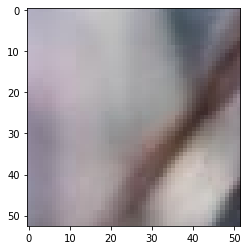

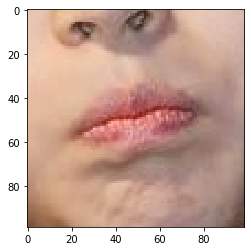

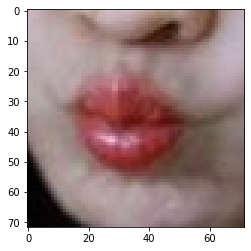

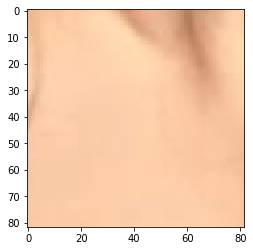

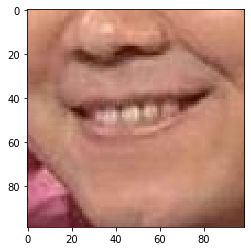

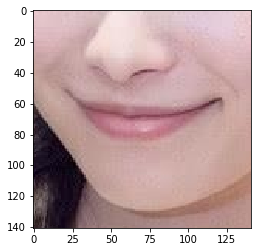

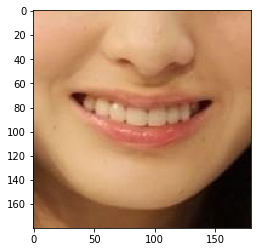

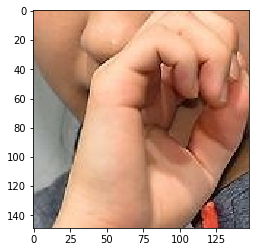

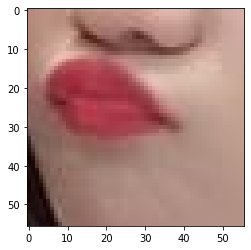

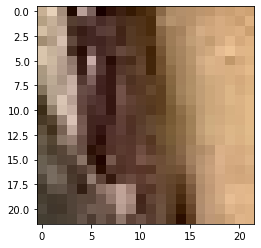

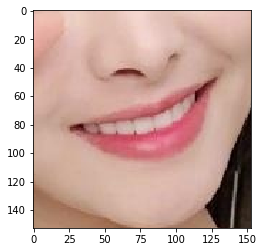

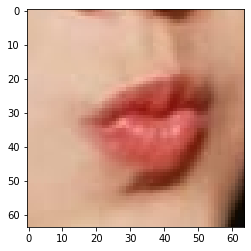

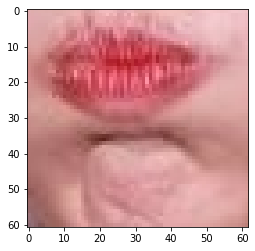

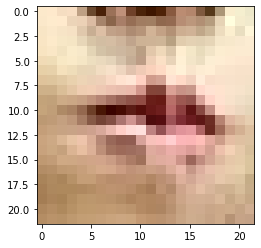

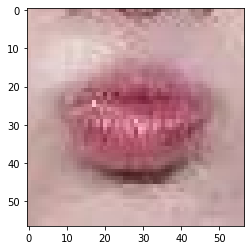

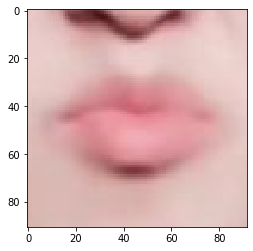

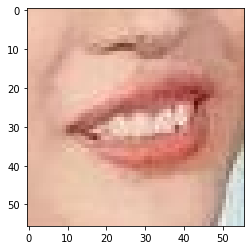

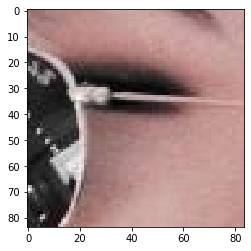

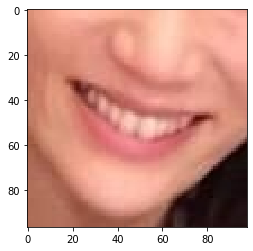

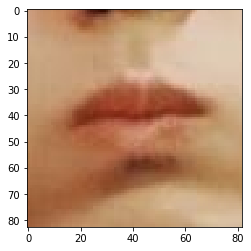

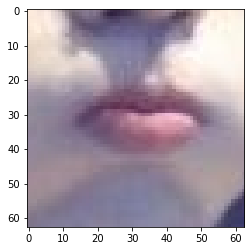

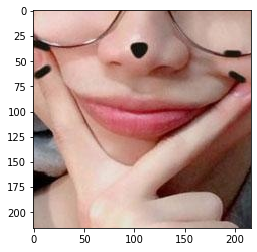

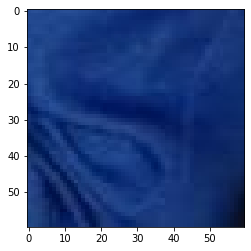

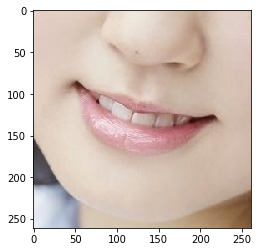

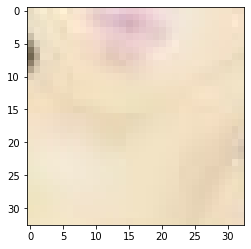

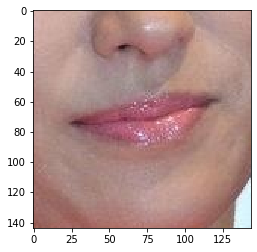

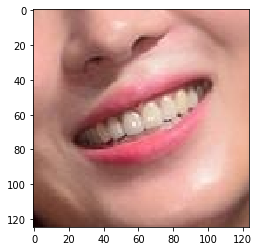

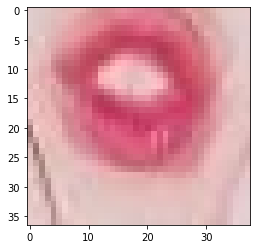

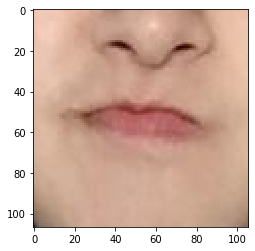

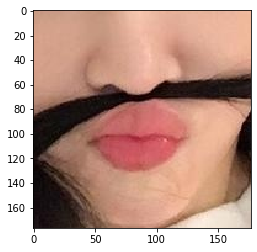

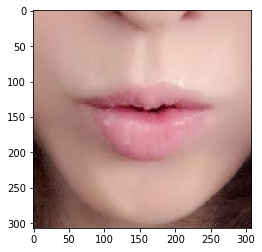

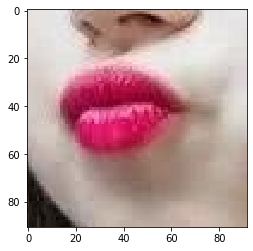

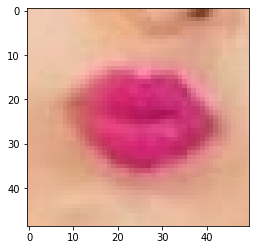

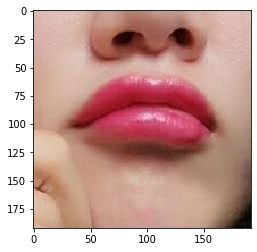

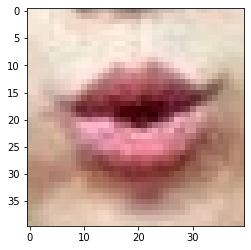

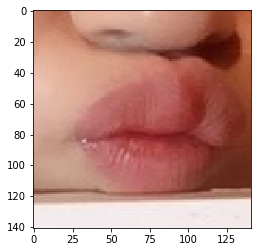

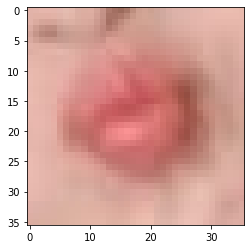

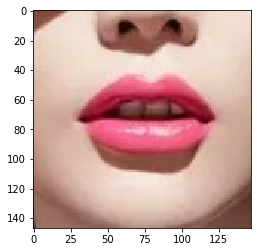

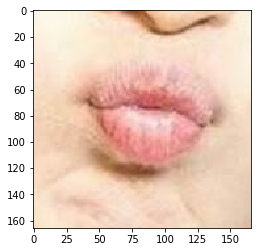

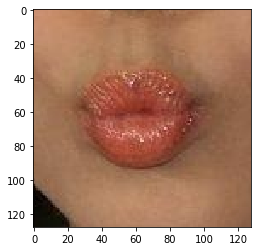

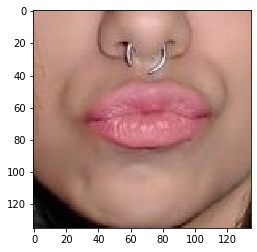

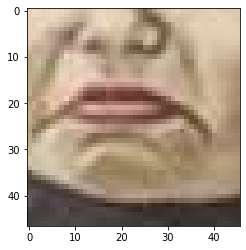

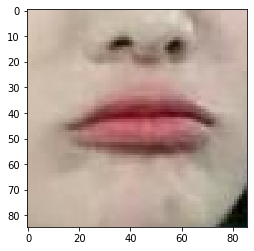

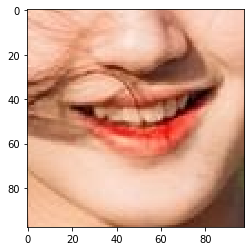

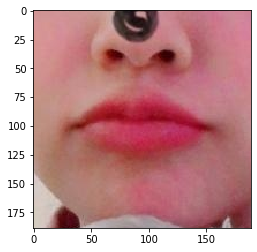

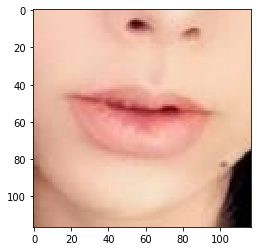

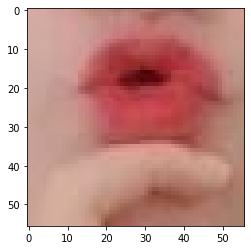

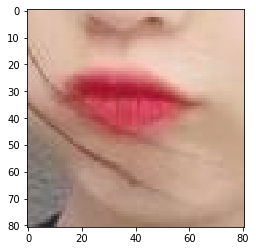

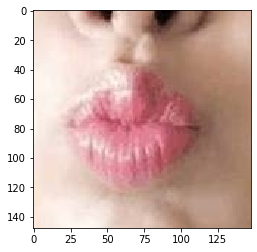

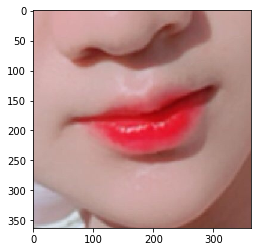

In [15]:
# coding:utf8

import cv2
import dlib
import numpy as np
import sys
import os
import matplotlib.pyplot as plt

# 配置 Dlib 关键点检测路径
# 文件可以从 http://dlib.net/files/ 下载
PREDICTOR_PATH = r"C:\Users\ThinkPad\Desktop\Emotion_Recognition_File\face_detect_model\shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(PREDICTOR_PATH)
# 配置人脸检测器路径
cascade_path = r'C:\Users\ThinkPad\Desktop\Emotion_Recognition_File\face_detect_model\haarcascade_frontalface_default.xml'
cascade = cv2.CascadeClassifier(cascade_path)

# 调用 cascade.detectMultiScale 人脸检测器和 Dlib 的关键点检测算法 predictor 获得关键点结果
def get_landmarks(im):
    rects = cascade.detectMultiScale(im, 1.3, 5) # 人脸检测
    x, y, w, h = rects[0]  # 获取人脸的四个属性值，左上角坐标 x,y 、高宽 w、h
#     print(x, y, w, h)
    rect = dlib.rectangle(int(x), int(y), int(x + w), int(y + h)) 
    return np.matrix([[p.x, p.y] for p in predictor(im, rect).parts()])


def annotate_landmarks(im, landmarks):
    im = im.copy()
    for idx, point in enumerate(landmarks):
        pos = (point[0, 0], point[0, 1])
        cv2.putText(im,
                    str(idx),
                    pos,
                    fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
                    fontScale=0.4,
                    color=(0, 0, 255))
        cv2.circle(im, pos, 5, color=(0, 255, 255))
    return im


def getlipfromimage(im, landmarks):
    xmin = 10000
    xmax = 0
    ymin = 10000
    ymax = 0
    # 根据最外围的关键点获取包围嘴唇的最小矩形框
    # 68 个关键点是从
    # 左耳朵0 -下巴-右耳朵16-左眉毛（17-21）-右眉毛（22-26）-左眼睛（36-41）
    # 右眼睛（42-47）-鼻子从上到下（27-30）-鼻孔（31-35）
    # 嘴巴外轮廓（48-59）嘴巴内轮廓（60-67）
    for i in range(48, 67):
        x = landmarks[i, 0]
        y = landmarks[i, 1]
        if x < xmin:
            xmin = x
        if x > xmax:
            xmax = x
        if y < ymin:
            ymin = y
        if y > ymax:
            ymax = y

    print("xmin=", xmin)
    print("xmax=", xmax)
    print("ymin=", ymin)
    print("ymax=", ymax)

    roiwidth = xmax - xmin
    roiheight = ymax - ymin

    roi = im[ymin:ymax, xmin:xmax, 0:3]

    if roiwidth > roiheight:
        dstlen = 1.5 * roiwidth
    else:
        dstlen = 1.5 * roiheight

    diff_xlen = dstlen - roiwidth
    diff_ylen = dstlen - roiheight

    newx = xmin
    newy = ymin

    imagerows, imagecols, channel = im.shape
    if newx >= diff_xlen / 2 and newx + roiwidth + diff_xlen / 2 < imagecols:
        newx = newx - diff_xlen / 2
    elif newx < diff_xlen / 2:
        newx = 0
    else:
        newx = imagecols - dstlen

    if newy >= diff_ylen / 2 and newy + roiheight + diff_ylen / 2 < imagerows:
        newy = newy - diff_ylen / 2
    elif newy < diff_ylen / 2:
        newy = 0
    else:
        newy = imagerows - dstlen

    roi = im[int(newy):int(newy + dstlen), int(newx):int(newx + dstlen), 0:3]
    return roi


def listfiles(rootDir):
    list_dirs = os.walk(rootDir)
    for root, dirs, files in list_dirs:
        for d in dirs:
            print(os.path.join(root, d))
        for f in files:
            fileid = f.split('.')[0]

            filepath = os.path.join(root, f)
            try:
                im = cv2.imread(filepath, 1)
                # plt.imshow(im[:, :, ::-1])
                # plt.show()
                landmarks = get_landmarks(im)
                roi = getlipfromimage(im, landmarks)
                filepath = filepath[8:]
                roipath = filepath.replace('.jpg', '_mouth.png')
                print(roipath)
                cv2.imwrite(r'./mou/'+roipath, roi)
                plt.imshow(roi[:, :, ::-1])
                plt.show()
            except:
                print("error")
                continue


# listfiles(r"C:\Users\ThinkPad\Desktop\Emotion_Recognition_File\mouth_det_img")
listfiles(r'.\duzui')

> 运行上面的代码会显示嘴巴区域图，如果看不到，重新运行一下即可

> **（xmin，ymin） （xmax，ymax） 分别代表嘴唇区域在原始图像的位置，即左上角坐标和右下角坐标**

结果如下，⾃此就完成了⾃建数据集操作


<img src="http://tianchi-media.oss-cn-beijing.aliyuncs.com/dragonball/DL/other/img/自建数据集.png"  alt="图片无法加载时显示的文字" align=center />

每种表情放置在各自的文件夹下并命名


<img src="http://tianchi-media.oss-cn-beijing.aliyuncs.com/dragonball/DL/other/img/数据集.jpg"  alt="图片无法加载时显示的文字" align=center />


上面就是本训练营『数据获取与整理』部分的内容，有了数据，接下来的任务就可以训练我们的表情分类模型吧。

加油！这也许是你的第一个深度学习模型了。

---
-- By：有三AI 团队

聚焦于让大家能够系统性地完成AI各个领域所需的专业知识的学习，实现三人行必有AI，三人行必有我师的愿景。